In [6]:
import pysam
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import scipy

0. Разобраться с minimap2

Запустить minimap2, определить процент приложившихся ридов (samtools flagstat). 


minimap2 -ax map-pb ./data/reference.fasta ./data/pacbio_40x.fq > ./datapb.sam

In [2]:
!samtools flagstat pb.sam

0 + 0 in total (QC-passed reads + QC-failed reads)
0 + 0 secondary
0 + 0 supplementary
0 + 0 duplicates
0 + 0 mapped (N/A : N/A)
0 + 0 paired in sequencing
0 + 0 read1
0 + 0 read2
0 + 0 properly paired (N/A : N/A)
0 + 0 with itself and mate mapped
0 + 0 singletons (N/A : N/A)
0 + 0 with mate mapped to a different chr
0 + 0 with mate mapped to a different chr (mapQ>=5)


minimap2 -ax map-pb ./data/reference.fasta ./data/SRR6334890.fastq > ./data/ont.sam

In [3]:
!samtools flagstat ./data/ont.sam

32093 + 0 in total (QC-passed reads + QC-failed reads)
1063 + 0 secondary
220 + 0 supplementary
0 + 0 duplicates
29297 + 0 mapped (91.29% : N/A)
0 + 0 paired in sequencing
0 + 0 read1
0 + 0 read2
0 + 0 properly paired (N/A : N/A)
0 + 0 with itself and mate mapped
0 + 0 singletons (N/A : N/A)
0 + 0 with mate mapped to a different chr
0 + 0 with mate mapped to a different chr (mapQ>=5)


1. Статистики ридов PacBio и Oxford Nanopores

Посчитать статистики из задания 2 для ридов PacBio и Oxford Nanopores:
Покрытие генома

Процент ошибок

Распределение типов замен

Распределение длин инделов

Сравнить результаты.


#### Покрытие генома:

In [7]:
def get_coverage(file, length_ref):
    bamfile = pysam.AlignmentFile(file, 'rb')
    positions = [0 for i in range(length_ref)]

    for read in bamfile.fetch():
        for pos in read.get_reference_positions():
            positions[pos] += 1

    bamfile.close()
    pos_average = []
    curr = 0
    step = 3000
    ave_coverage = 0
    per_coverage = 0
    for i in range(len(positions)):
        if positions[i] != 0:
            per_coverage += 1
        ave_coverage +=  positions[i]
        if i % step == 0 and i != 0:
            pos_average.append(curr / step)
            curr = 0
        curr +=  positions[i]
    pos_average.append(curr / (len(positions) % step))
    
    ave_coverage /= len(positions)
    per_coverage /= len(positions)
    
    print('average coverage of genome: ', ave_coverage)
    print('proportion of the covered genome: ', per_coverage)
    
    plt.plot([i for i in range(len(pos_average))], pos_average)
    plt.gca().set(xlabel='average positions', ylabel='reads')
    plt.show()

def ref_len(path):
    f=open(path, 'r')
    s = ''
    for line in f:
        if line[0] != '>':
            s += line

    f.close()
    return len(s)

average coverage of genome:  38.43161699097548
proportion of the covered genome:  0.9859152984185788


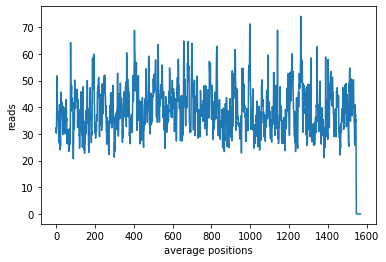

In [8]:
get_coverage('./data/pb.sam', ref_len('./data/reference.fasta'))

average coverage of genome:  26.471059127824585
proportion of the covered genome:  0.9857297888612242


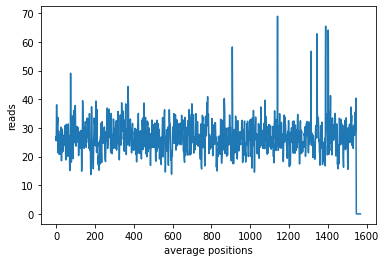

In [9]:
get_coverage('./data/ont.sam', ref_len('./data/reference.fasta'))